In [25]:
import pandas as pd
import seaborn as sns

In [26]:
data = pd.read_csv('test_data/2021_fantasy_scores.csv')
# only keep these columns
data = data[['player_id','player_name','game_id','game_date','fantasy_score','fantasy_score_cumul']]

In [27]:
def game_interval(rn, interval=10):
    assert interval > 1
    if rn % interval == 0:
        return rn // interval - 1
    
    return rn // interval

# equivalent to: row_number() over (partition by player_id order by game_date)
data['rn'] = data.sort_values(by='game_date').groupby(['player_id']).cumcount()+1

# bucketing row numbers into intervals of 10. i.e. 25 = 2, 45 = 4, 12 = 1, 6 = 0
# uses the game_interval function above
data['interval'] = data.apply(lambda x: game_interval(x['rn']),axis=1)

In [28]:
# averaging fantasy_score by player, and ten_game intervals
grouped_games = data.groupby(['player_id','player_name','interval']).agg({'fantasy_score':['mean']})
grouped_games.columns = ['interval_avg']
grouped_games = grouped_games.reset_index()

Player:  jayson tatum


<AxesSubplot:xlabel='ten_games', ylabel='moving_10g_avg'>

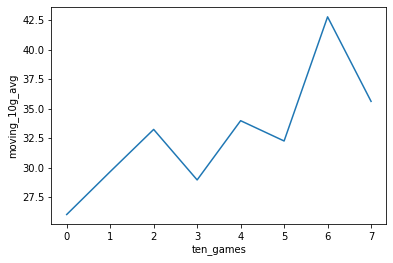

In [29]:
player = input('Player: ').lower()
sns.lineplot(data=grouped_games.loc[grouped_games['player_name'].str.lower() == player],x='interval',y='interval_avg')